# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Anh Nguyen
### Preferred Name (if different): N/A
### Student ID: 015442011
### Email address: anh.t.nguyen07@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
np.random.seed(42)

#### Code the solution

### Part 1. Load the data from "homework4_input_data.csv" file

In [3]:
data = pd.read_csv('homework4_input_data.csv')

In [4]:
features = data.columns[1:3001]
X = np.array(data.loc[:,features])
Y = np.array(data['Class'])
X.shape, Y.shape, features

((4336, 3000),
 (4336,),
 Index(['ASS1', 'SPX', 'C6orf141', 'SP5', 'SP6', 'ITGA8', 'ATP2A1', 'ATP2A3',
        'ITGA2', 'ITGA3',
        ...
        'SULT1B1', 'IKZF1', 'SLC14A1', 'TCEAL2', 'TCEAL7', 'TCEAL5', 'VCAN',
        'CDR1', 'KRBOX1', 'SELL'],
       dtype='object', length=3000))

In [5]:
data.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [6]:
data.describe()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
count,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,...,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000
mean,6.493217,0.875979,2.547433,2.024070,2.788808,2.838891,2.413940,5.273215,4.531003,6.358596,...,1.347919,4.490551,1.933813,1.628066,2.083775,1.000454,7.176974,6.762318,1.764221,3.516539
std,1.341540,1.322937,1.712000,1.442751,1.385994,1.147753,1.535475,1.570749,1.198838,1.524787,...,1.342945,1.281910,1.314929,1.694187,1.368720,1.282440,1.285927,3.121063,1.190842,1.496502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.197540,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.807468,0.000000,0.000000,0.000000
25%,5.697111,0.000000,1.105780,0.999840,1.810114,2.055747,1.497904,4.215464,3.813267,5.600968,...,0.350634,3.745679,1.122227,0.288757,1.079199,0.000000,6.466050,5.784987,0.875012,2.394757
50%,6.588478,0.279846,2.391468,1.710090,2.679240,2.630627,2.061542,5.211668,4.398703,6.357384,...,0.897331,4.490178,1.567558,0.999664,1.784131,0.428042,7.346725,7.762936,1.421289,3.475282
75%,7.415357,1.159160,3.819411,2.976235,3.748897,3.439166,2.858414,6.405440,5.331706,7.364287,...,2.088001,5.119473,2.091528,2.583887,2.742996,1.499093,8.090525,8.925813,2.575496,4.371683
max,10.753816,6.531445,8.714974,7.458509,7.685174,7.041480,10.548175,10.840692,8.464498,10.031628,...,7.199111,9.034211,7.237835,7.120254,6.901291,5.933580,11.307692,14.115754,6.007571,8.039268


### Part 2. Produce a PCA plot of the input data, using the colors specified above. 

In [7]:
pca = PCA(n_components = 2)
X_reduced = np.array(pca.fit_transform(X))
print(X_reduced)

[[82.04598902 46.7130452 ]
 [76.72251477 37.9190887 ]
 [76.64320355 39.8676599 ]
 ...
 [-6.45313027 -2.46852613]
 [ 1.54972972  3.37494376]
 [ 9.11558797  9.49003632]]


In [8]:
principalDf = pd.DataFrame(data = X_reduced, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['Class']]], axis = 1)

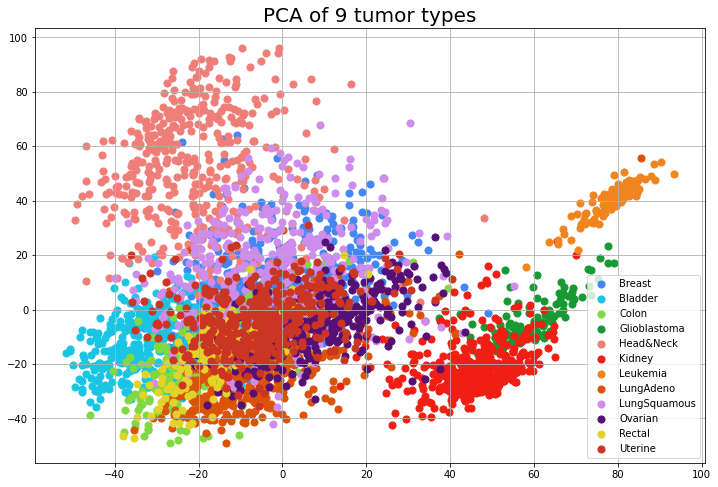

In [9]:
fig = plt.figure(figsize = (12,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_title('PCA of 9 tumor types', fontsize = 20)
targets = ['Breast', 'Bladder', 'Colon', 'Glioblastoma', 'Head&Neck', 'Kidney', 'Leukemia', 'LungAdeno', 'LungSquamous', 'Ovarian',
          'Rectal', 'Uterine']
colors = ['#4287f5',
'#19c5e3',
'#80d941',
'#179933',
'#f07e78',
'#f01e13',
'#f0841f',
'#db5209',
'#ce8ced',
'#551075',
'#e3d329',
'#cc3423']
          
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Part 3. Normalize the data using StandardScaler.  

In [10]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [11]:
print(X_rescaled)

[[-1.90712548 -0.26659689 -1.48815802 ... -0.28717918 -1.48166105
   2.70287004]
 [-2.32626443 -0.66222355 -1.48815802 ... -0.07930675 -1.23869714
   3.01223639]
 [-1.71085564 -0.66222355 -1.48815802 ... -2.16692113 -1.48166105
   3.01739253]
 ...
 [ 0.95680383 -0.01256317 -0.3104437  ...  1.09636527  2.58748176
  -0.96701899]
 [ 1.43762043  0.31140135 -1.48815802 ... -0.14351678  0.11035555
  -0.41217216]
 [ 0.13807804 -0.01256317  1.53238206 ... -2.16692113 -0.60944949
  -1.33111116]]


### Part 4. Break the data into training anf test dataset

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

### Part 5. Define SVM model hyperparameters

In [13]:
model = SVC(kernel='rbf')

### Part 6. Report from 5-fold- cross-validation

In [19]:
scores = cross_val_score(model, X_train, Y_train, cv=5)

In [20]:
print('Individual cross validation accuracys: ',scores)
print('Mean cross validation accuracy: {:.2%}'.format(scores.mean()))

Individual coress-validation accuracies:  [0.95 0.95 0.97 0.96 0.96]
Mean cross validation accuracy: 95.85%


### Part 7. Train the final model on all the training data and assess model performance on the test set

In [16]:
model.fit(X_train,Y_train)

SVC()

In [17]:
print('Accuracy of linear SVC on training set: {:.2%}'.format(model.score(X_train, Y_train)))
print('Accuracy of linear SVC on test set: {:.2%}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 97.95%
Accuracy of linear SVC on test set: 95.85%


### Part 8. Plot two confusion matrices fot test set predictions

Confusion matrix, without normalization
[[ 59   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0]
 [  0   0  66   0   0   0   0   0   0   0   0   0]
 [  0   1   0  27   0   0   0   0   0   0   0   0]
 [  0   0   0   0  80   0   0   0   1   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   1   0   0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0   0   0   2  67   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0   0]
 [  0   0  31   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  74]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.04 0.   0.96 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.

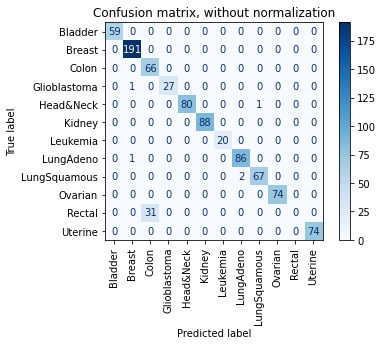

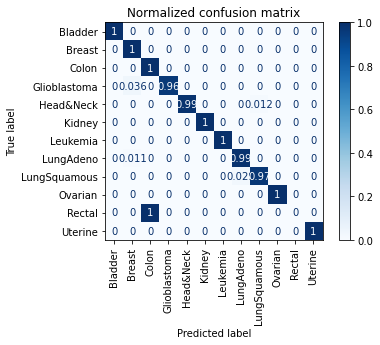

In [18]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation='vertical')
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()